In [1]:
import qiskit
import numpy as np
import qtm.constant, qtm.nqubit
import importlib

importlib.reload(qtm.nqubit)

<module 'qtm.nqubit' from 'c:\\Users\\HAI\\Desktop\\vutuanhai\\QuantumTomography\\codes\\qtm\\nqubit.py'>

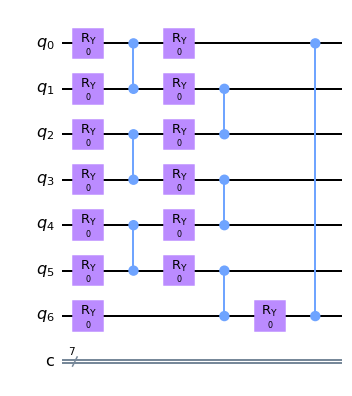

In [3]:
num_qubits = 7
num_layers = 1
thetas = np.zeros(2*num_qubits*num_layers)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_polygongraph_state(qc, thetas, num_layers)
qc.draw('mpl')

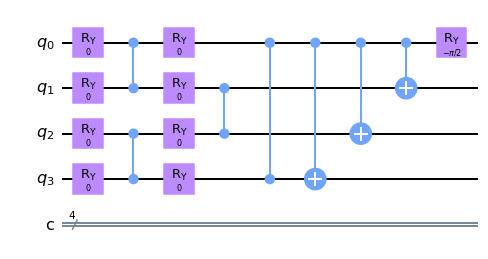

In [16]:
num_qubits = 4
num_layers = 1
thetas = np.zeros(2*num_qubits*num_layers)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_GHZchecker_polygongraph(qc, thetas, num_layers, np.pi/2)
qc.draw('mpl')

In [17]:
# Init parameters
num_qubits = 6
num_layers = 2
thetas = np.ones(2*num_qubits*num_layers)

# For determine GHZ state
theta = np.pi/2

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 400, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_GHZchecker_polygongraph, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_fubini_study,
    optimizer = qtm.base.sgd,
    verbose = 1,
    theta = theta,
    num_layers= num_layers,
    is_return_all_thetas = True
)


Step: 100%|██████████| 400/400 [12:29<00:00,  1.87s/it]


In [18]:
np.savetxt("../experiments/polygon_ansatz_ghz/" + str(num_qubits) + "/loss_values_sgd.csv", loss_values, delimiter=",")
np.savetxt("../experiments/polygon_ansatz_ghz/" + str(num_qubits) + "/thetass_sgd.csv", thetass, delimiter=",")

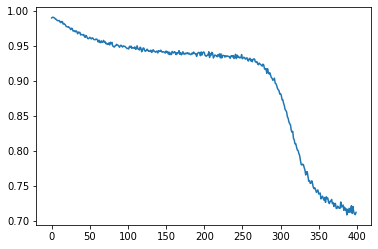

In [19]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [20]:
traces = []
fidelities = []
i = 0
for thetas in thetass:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_polygongraph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/polygon_ansatz_ghz/" + str(num_qubits) + "/traces_sgd.csv", traces, delimiter=",")
np.savetxt("../experiments/polygon_ansatz_ghz/" + str(num_qubits) + "/fidelities_sgd.csv", fidelities, delimiter=",")

### W state preparation

In [12]:
# Init parameters
num_qubits = 4
num_layers = 2
thetas = np.ones(2*num_qubits*num_layers)


qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_Wchecker_polygongraph, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_fubini_study,
    optimizer = qtm.base.sgd,
    verbose = 1,
    num_layers= num_layers,
    is_return_all_thetas = True
)
np.savetxt("../experiments/polygon_ansatz_w/" + str(num_qubits) + "/loss_values_sgd.csv", loss_values, delimiter=",")
np.savetxt("../experiments/polygon_ansatz_w/" + str(num_qubits) + "/thetass_sgd.csv", thetass, delimiter=",")

Step: 100%|██████████| 100/100 [02:29<00:00,  1.50s/it]


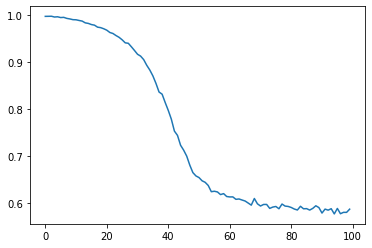

In [13]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [14]:
traces = []
fidelities = []
i = 0
for thetas in thetass:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_polygongraph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/polygon_ansatz_w/" + str(num_qubits) + "/traces_sgd.csv", traces, delimiter=",")
np.savetxt("../experiments/polygon_ansatz_w/" + str(num_qubits) + "/fidelities_sgd.csv", fidelities, delimiter=",")

In [15]:
import os, qiskit, qtm.constant, qtm.nqubit, pandas as pd, numpy as np
path = "../experiments/polygon_ansatz_w/"
dirs = os.listdir(path)
dirs = list(map(int, dirs))
dirs.sort()
num_layers = 2
for dir in dirs:
    dir = str(dir)
    num_qubits = int(dir)
    print(num_qubits)
    thetass_sgd = pd.read_csv(path + dir + "/thetass_adam.csv", sep=",", header=None).to_numpy()
    loss_values = []
    for thetas in thetass_sgd:
        qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
        qc_copy = qtm.nqubit.create_Wchecker_polygongraph(qc.copy(), thetas, num_layers)
        loss = qtm.base.loss_fubini_study(
            qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
        loss_values.append(loss)
        np.savetxt("../experiments/polygon_ansatz_w/" + str(num_qubits) + "/loss_values_adam.csv", loss_values, delimiter=",")

2
3
4
5
6
7
8
9
10
